# G Logistic regression MNIST
_4 points_

Evalute logistic regression as B  on MNIST

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



## Download and prepare Data

In [41]:
train = tf.keras.datasets.mnist.load_data()[0] #load training data train
X_train, Y_train = train[0], train[1]  #split it into X and Y data

test = tf.keras.datasets.mnist.load_data()[1]#load test data
X_test, Y_test = test[0], test[1] #split it into X and Y data

n_train = X_train.shape[0] #Dimension 1: nr of lines (?)-> 60 000
n_test = X_test.shape[0] #Dimension 1: nr of lines (?)-> 10 000

m = X_train.shape[1]**2 

X_train = X_train.reshape([n_train, m])
X_test = X_test.reshape([n_test, m])

## Create Sample Set for faster Training

In [43]:
idx = np.random.randint(n_train, size=1000) #random index: with n_train being the Lowest (signed) integer to be drawn 
#from the distribution and size being the Output shape. 
x_train_sample = X_train[idx] #choose 1 sample in trainingsdata with this randomly-chosen index. 
y_train_sample = Y_train[idx] #corresponding entry on Y-axis. 

In [44]:
# do the same for test data
idx = np.random.randint(n_test, size=100) 
x_test_sample = X_test[idx]
y_test_sample = Y_test[idx]

In [45]:
#now: use the Scikit-learn algorithm

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logisticRegr = LogisticRegression(n_jobs=-1)
logisticRegr.fit(x_train_sample, y_train_sample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
#Prediction
predictions = logisticRegr.predict(x_test_sample)


### Measure Model Performance

In [49]:
score = logisticRegr.score(x_test_sample, y_test_sample)
print(score)

0.78


#### Testing different confusion matrices

[[11  0  2  0  0  0  1  0  0  0]
 [ 0 12  0  1  0  0  0  0  0  0]
 [ 0  0  4  1  0  0  0  2  1  1]
 [ 0  0  0  8  0  2  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  1]
 [ 0  0  0  1  1  7  2  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  1]
 [ 0  0  1  0  0  0  0  0  6  0]
 [ 2  0  0  0  0  0  0  2  0  4]]


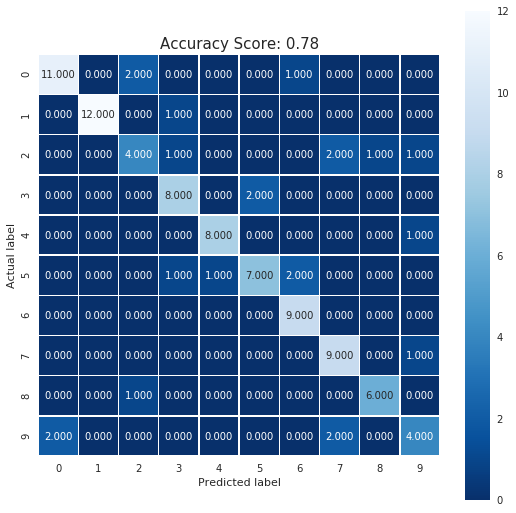

In [50]:
import seaborn as sns # fancy graphing pythin lib
from sklearn import metrics

#normal sklearn confusion matrix
cm = metrics.confusion_matrix(y_test_sample, predictions)
print(cm)

#fancy confusion matrix from the internet
#take confusion matrix from sklearn and convert it into new layout
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);




### classification report


In [51]:
classification_report = metrics.classification_report(y_test_sample, predictions)

print(classification_report)

             precision    recall  f1-score   support

          0       0.85      0.79      0.81        14
          1       1.00      0.92      0.96        13
          2       0.57      0.44      0.50         9
          3       0.73      0.80      0.76        10
          4       0.89      0.89      0.89         9
          5       0.78      0.64      0.70        11
          6       0.75      1.00      0.86         9
          7       0.69      0.90      0.78        10
          8       0.86      0.86      0.86         7
          9       0.57      0.50      0.53         8

avg / total       0.78      0.78      0.78       100



## Fazit
- Funktioniert nicht so gut wie KNN und dauert länger